# **Using Machine Learning to Analyze Voice Disorders for Parkinson's Disease Detection**


## Objectives

- Use Python for data analysis and machine learning
- Implement machine learning algorithms to detect Parkinson's disease in voice recordings
- Evaluate model performance
- Conduct grid search for tuning parameters
- Visualize the decision tree model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings("ignore")

Creating helper function for plotting

In [2]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max() / 4

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    

LOADING DATA

In [3]:
data = pd.read_csv('data/parkinsons.data', sep=",", index_col='name')
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print(data.shape)

(195, 23)


In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Axes: >

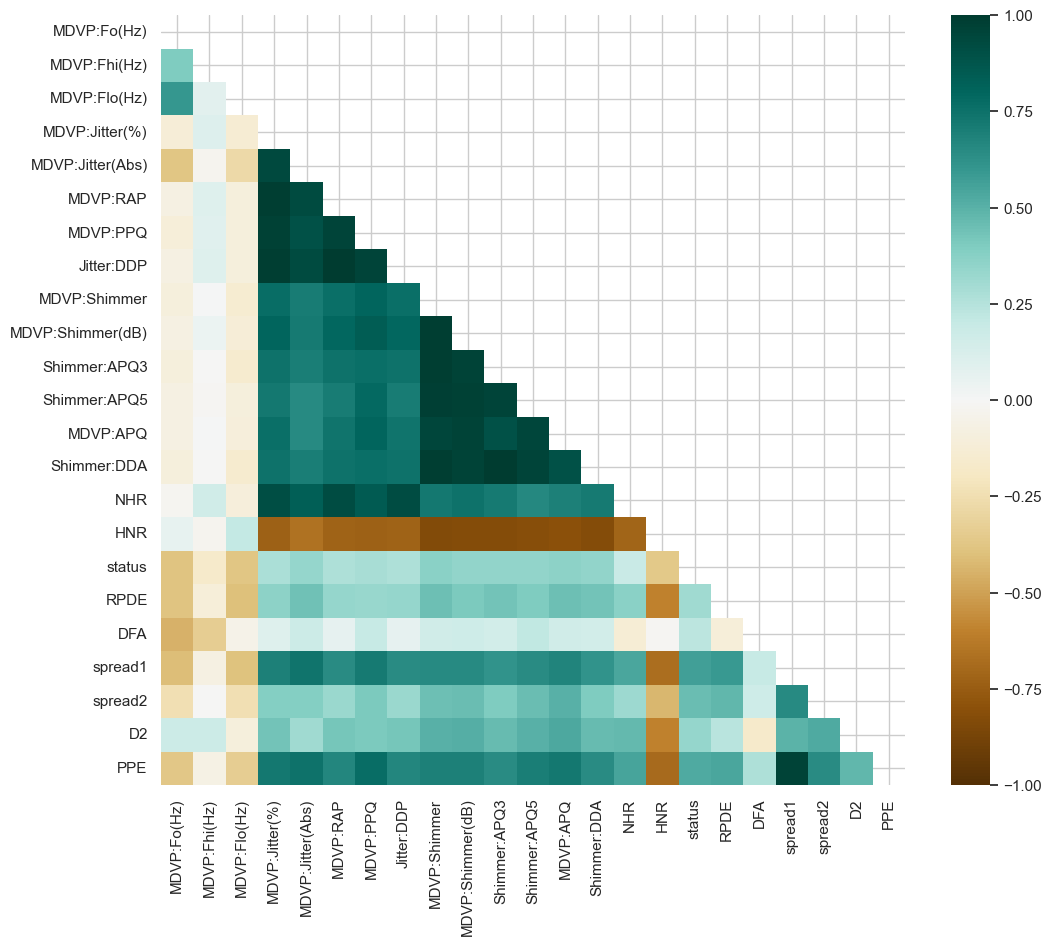

In [6]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='BrBG', mask=mask)

Text(0.5, 1.0, 'Features correlating with Parkinson existance')

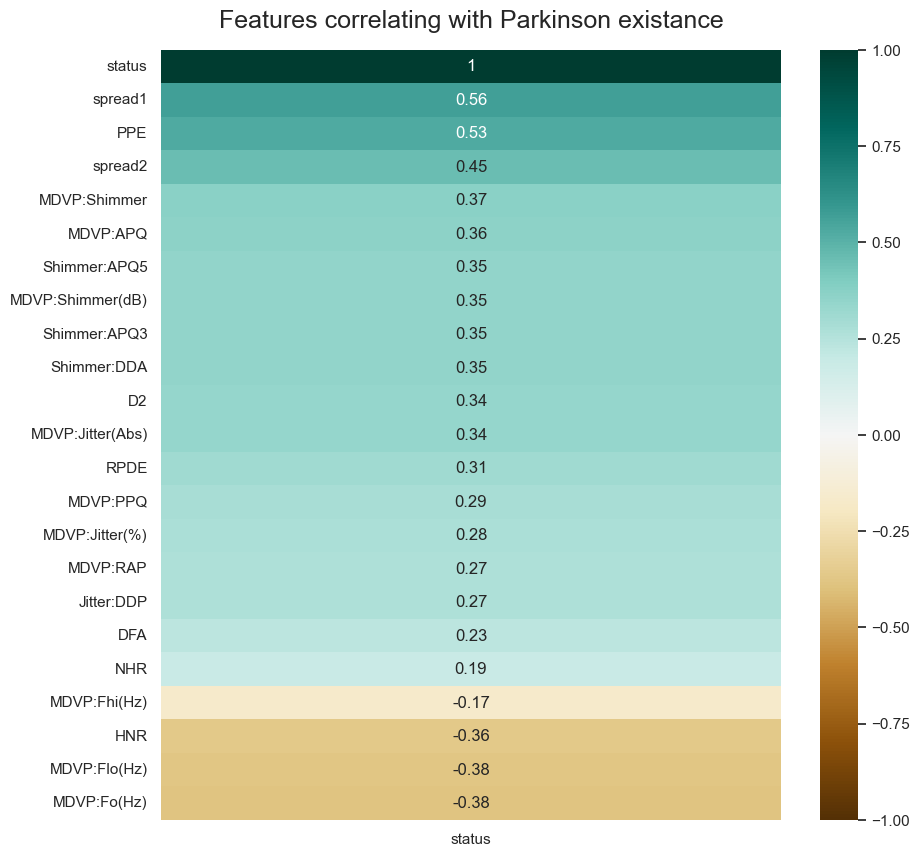

In [7]:
# modify the heatmap plot to show correlation variables to the status 
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False),  vmin=-1, vmax=1, cmap="BrBG", annot=True)
heatmap.set_title("Features correlating with Parkinson existance", fontdict={'fontsize':18}, pad=16)

Data Splitting

In [8]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
y = data.status
y.head()

# 0 ==> Healthy
# 1 ==> Parkinson

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

In [10]:
y.value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets. It is particularly useful for visualizing complex data structures, as it helps to project the data points from a high-dimensional space to a lower-dimensional space (usually 2D or 3D) while preserving the relationships between the data points as much as possible. Lets apply it to our dataset:


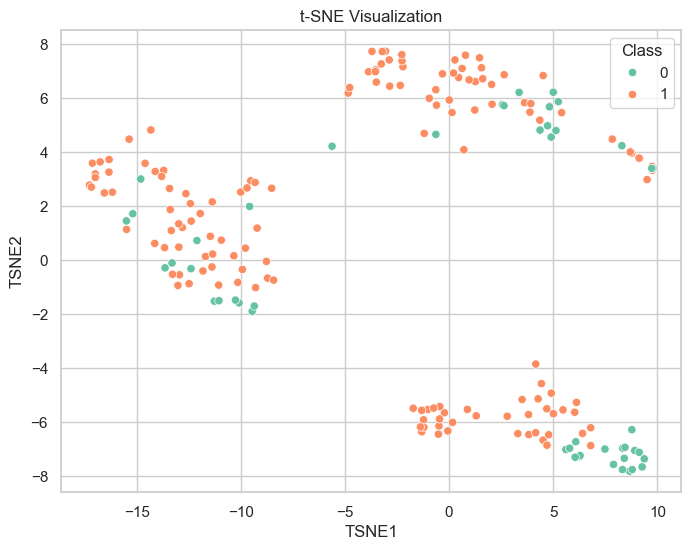

In [11]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# visualize the data based on class using a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [12]:
tsne_df['Class'].value_counts(normalize=True)

Class
1    0.753846
0    0.246154
Name: proportion, dtype: float64

## Data Preparation

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# print the shape of train and test data
print(f"""
X_train shape: {X_train.shape}
X_test shape : {X_test.shape}
y_train shape: {y_train.shape}
y_test shape : {y_test.shape}
""")


X_train shape: (136, 22)
X_test shape : (59, 22)
y_train shape: (136,)
y_test shape : (59,)



### *k-Nearest Neighbour (k-NN)*

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

Classification Report

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Normalized confusion matrix
[[0.75       0.25      ]
 [0.10638298 0.89361702]]


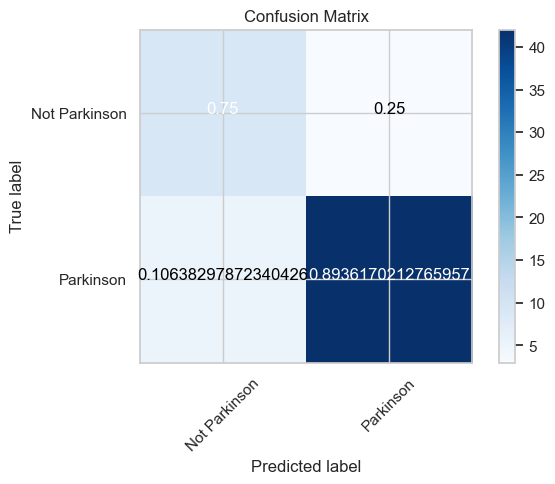

In [19]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Not Parkinson', 'Parkinson'], title='Confusion Matrix')

In [20]:
print("\nClassification Reprot:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))


Classification Reprot:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score:  0.864406779661017


## **GridSearchCV**

The param_grid parameter specifies a dictionary of hyperparameters to search over, while the scoring parameter specifies the performance metric to optimize for, which in this case is the recall. The cv parameter specifies the number of folds for cross-validationv ```cv``` . The resulting grid_search object can be used to fit the data and obtain the best hyperparameters that maximize the performance metric.

In [21]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

In [22]:
knn = KNeighborsClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

Print the best parameters and score on validation data

In [25]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score     : ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score     :  0.97


Get the predicted labels on the test data using the best estimator:

In [26]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Calculate the recall score on the test data using the predicted labels:

In [27]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

np.float64(0.9148936170212766)

We can make predictions

In [28]:
y_hat = grid_search.best_estimator_.predict(X)
y_hat[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Now we use all our data to train the model

In [29]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

Let's study our predictions

In [30]:
y_hat = knn.predict(X)

Confusion matrix

Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.03401361 0.96598639]]


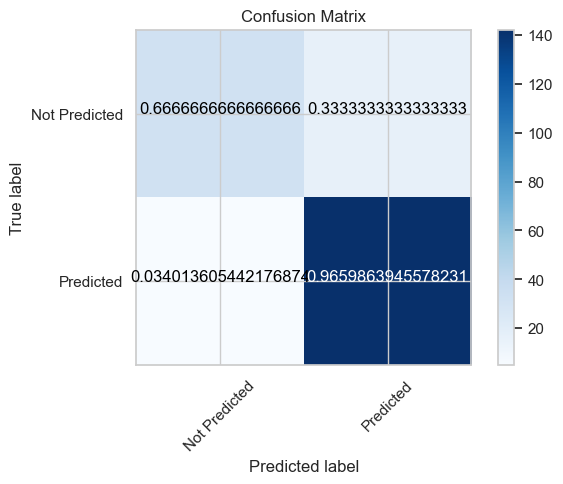

In [31]:
plot_confusion_matrix(confusion_matrix(y, y_hat), classes=["Not Predicted", "Predicted"], title="Confusion Matrix")

In [32]:
# find true positives (tp)
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat==1) & (y==1))] == "TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat==0) & (y == 0))] == "TN"
# find false positive (fp)
tsne_df['label'].iloc[np.where((y_hat==1) & (y == 0))] == "FP"
#find false negative (fn)
tsne_df['label'].iloc[np.where((y_hat==0) & (y == 1))] == "FN"

111    False
140    False
141    False
145    False
159    False
Name: label, dtype: bool

Plot the data, with the labeled predictions

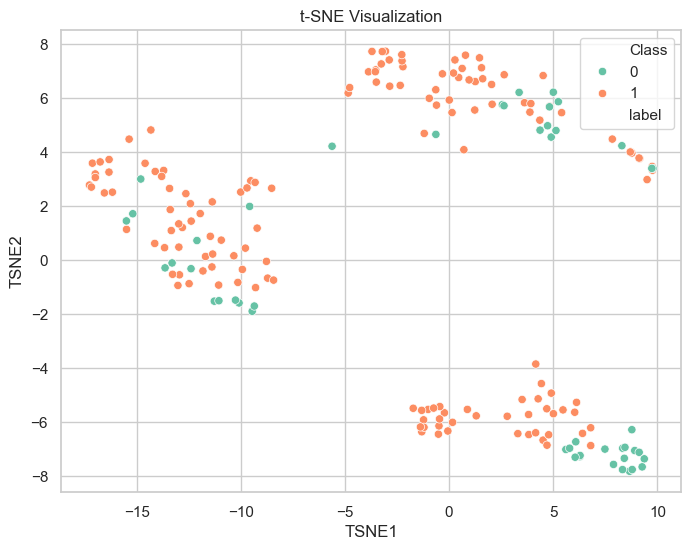

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2', style='label')
plt.title('t-SNE Visualization')
plt.show()

From the plot, we see most of the errors are confined to specific clusters. We can apply clustering to our data before we classify the data, but let's try several other models. Here are several more libraries for Machine Learning Interpretability


<ul>
  <li><a href="https://github.com/slundberg/shap">SHAP</a></li>
  <li><a href="https://github.com/marcotcr/lime">LIME</a></li>
  <li><a href="https://github.com/oracle/Skater">Skater</a></li>
  <li><a href="https://github.com/microsoft/interpret">Microsoft InterpretML</a></li>
  <li><a href="https://github.com/interpretml/interpret-text">Interpret-text</a></li>
  <li><a href="https://github.com/interpretml/interpret-core">Interpret-core</a></li>
  <li><a href="https://github.com/surrey-unplugged/saliency">Saliency</a></li>
  <li><a href="https://github.com/PAIR-code/facets">Facets</a></li>
  <li><a href="https://github.com/marcotcr/photonai">Photonai</a></li>
</ul>


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

We can get a probability of belonging to each class for each ssample, here are the first ten

In [37]:
lr.predict_proba(X_test)[0:10]

array([[0.2680232 , 0.7319768 ],
       [0.69156536, 0.30843464],
       [0.06766651, 0.93233349],
       [0.38582447, 0.61417553],
       [0.07229081, 0.92770919],
       [0.26269941, 0.73730059],
       [0.00913656, 0.99086344],
       [0.51065081, 0.48934919],
       [0.85892667, 0.14107333],
       [0.90261685, 0.09738315]])

Normalized confusion matrix
[[0.75       0.25      ]
 [0.12765957 0.87234043]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59

Accuracy Score: 
 0.847457627118644


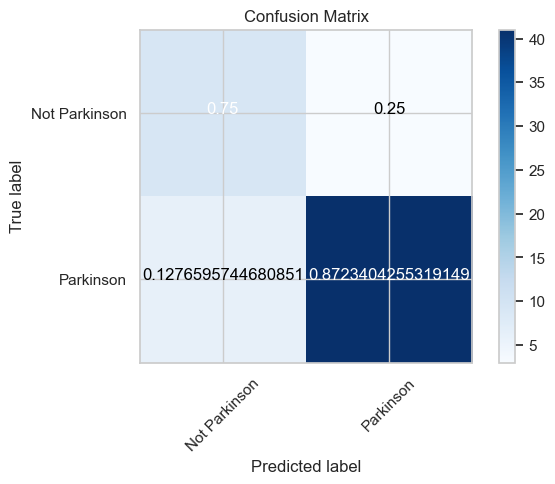

In [38]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Not Parkinson", "Parkinson"], title="Confusion Matrix")
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy Score: \n", accuracy_score(y_test, y_pred))

While grid search can be used to optimize hyperparameters for many machine learning algorithms, the hyperparameters in logistic regression may not be particularly insightful. Instead, we can use logistic regression to identify feature importance, as the coefficients learned during training can reveal which features are most strongly associated with the target variable. We can obtain the coefficients.


In [39]:
coef = abs(lr.coef_[0])
coef

array([2.37859571e-03, 4.41709527e-03, 3.29552927e-03, 8.81401237e-03,
       8.24903364e-05, 8.65243799e-03, 6.42811507e-03, 2.59359166e-02,
       1.61875024e-01, 1.54200358e+00, 8.67611262e-02, 9.63721367e-02,
       1.27957052e-01, 2.60268001e-01, 8.73901387e-03, 1.10438162e-01,
       6.83231628e-01, 9.06319116e-01, 1.24976902e+00, 8.01973486e-01,
       1.79737659e+00, 6.90519753e-01])

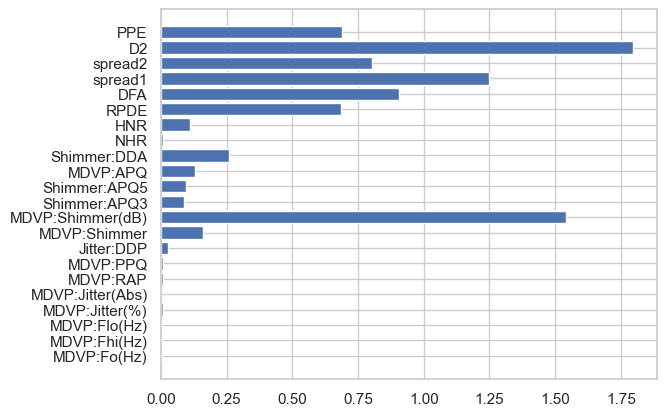

In [40]:
plt.barh(X.columns, coef)
plt.show()

In [41]:
best_columns = X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'MDVP:Shimmer(dB)', 'spread1', 'DFA', 'spread2'], dtype='object')

Normalized confusion matrix
[[0.75       0.25      ]
 [0.12765957 0.87234043]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score: 0.847457627118644


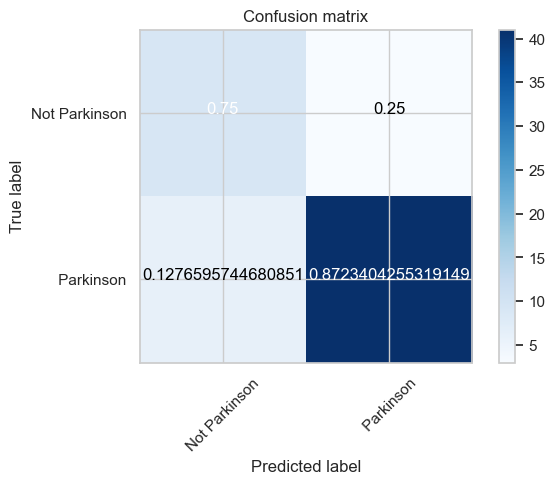

In [42]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

#get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# **Suport Vector Machine**


### Pros of SVM over Logistic Regression
<ul>
<li>Effective in high dimensional spaces and with datasets that have a lot of features</li>
<li>Can handle non-linearly separable data using kernel trick</li>
<li>Robust to overfitting due to the regularization parameter</li>
</ul>

### Cons of SVM compared to Logistic Regression<b>
<ul>
<li>Can be computationally expensive to train, especially with large datasets</li>
<li>Difficult to interpret the results and understand the impact of each feature on the model</li>
<li>Requires careful selection of hyperparameters to achieve optimal performance</li>
</ul>
You can train a SVM just like any other model 


In [43]:
from sklearn.svm import SVC

svm = SVC()

In [44]:
svm.fit(X_train, y_train)

SVC()

Normalized confusion matrix
[[0.33333333 0.66666667]
 [0.04255319 0.95744681]]


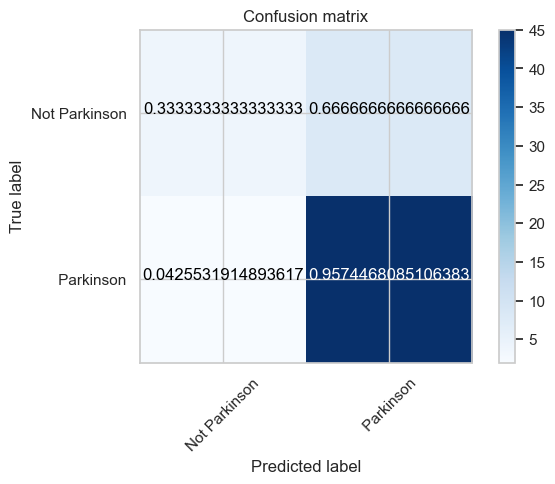

In [45]:
# make predictions on the test set
y_hat = svm.predict(X_test)

# confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')


## **GridSearchCV on SVM**

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
svm = SVC()

grid_params = {
    'C':[0.1, 1, ],
    'gamma': [0.1, 1, 10],
}

grid_search = GridSearchCV(svm, param_grid=grid_params, scoring='recall', cv=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameter: ", grid_search.best_params_)
print("Best Estimator : ", grid_search.best_estimator_)
print("Best Recall Score: ", grid_search.best_score_)

Best Hyperparameter:  {'C': 0.1, 'gamma': 0.1}
Best Estimator :  SVC(C=0.1, gamma=0.1)
Best Recall Score:  1.0


## **Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 93.22%


### **GridSearch on Random Forest Model**

In [49]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

rf_grid_params = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    # 'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_grid_params, scoring='recall', cv=5)
rf_grid_search.fit(X_train, y_train)

best_model = rf_grid_search.best_estimator_

print("Best Hyperparameter: ", rf_grid_search.best_params_)
print("Best Accuracy: ", rf_grid_search.best_score_)
print("Best Model: ", best_model)

Best Hyperparameter:  {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Best Accuracy:  0.95
Best Model:  RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)


### Plot the important features

<Axes: >

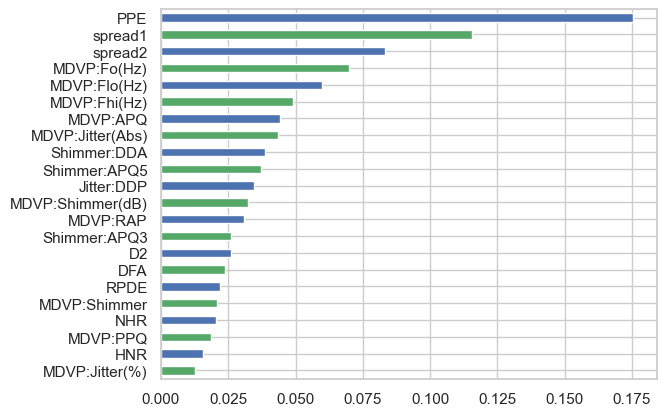

In [50]:
rf = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42, max_features='sqrt')
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color=['g', 'b'])

### **To Save the Model**

In [51]:
import pickle

filename = 'rf_model_parkinson'
pickle.dump(rf, open(filename, 'wb'))

## **Visualizing the Decision Trees**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4],
    'min_samples_split' : [2, 4],
    'min_samples_leaf' : [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameter: ", rf_grid_search.best_params_)
print("Best Accuracy: ", rf_grid_search.best_score_)
# print("Best Model: ", best_model)

Best Hyperparameter:  {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Best Accuracy:  0.95


Apply the parameters to the model

In [53]:
clf = grid_search.best_estimator_
# clf = DecisionTreeClassifier(max_depth-2, min_samples_leaf=1, min_samples_split=2, criterion='entropy')
# clf.fit(x_train, y_train)
y_pred = clf.predict(X_test)
y_pred[0:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

Plot the Tree

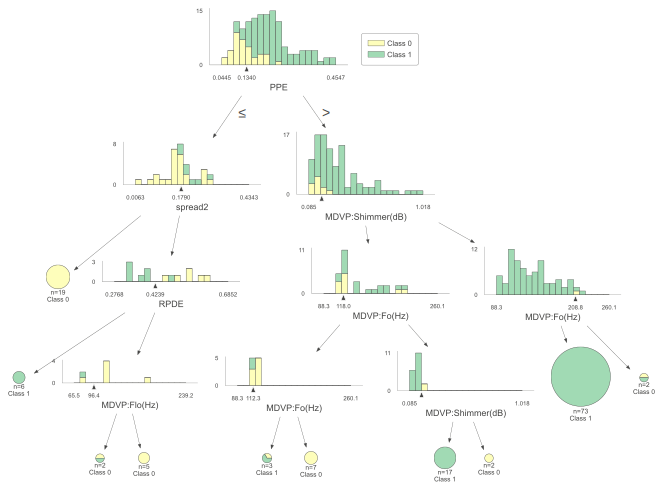

In [57]:
# plot the tree 
import dtreeviz

# Getting the list of variables
feature_names = list(X_train.columns)

# visualizing the tree
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object 
v

In [58]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand, : ].values

# visualizing the path for the point 
v = viz_model.view(fancy=True, scale=1.5, x=sample_point, show_just_path=True)

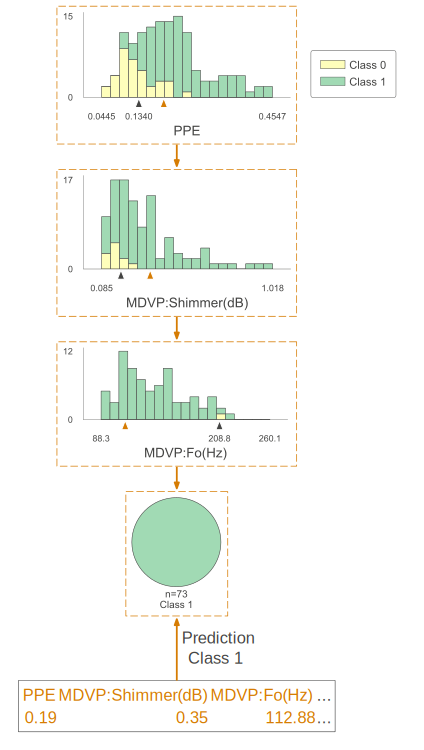

In [59]:
v